In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
training = pd.read_csv('train.csv')

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [6]:
training.head() #Overview of dataframe

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
training.value_counts() #How many diferent categories per column. Some I can convert to numeric. Some I can group into categories. Some (Windows) may not be relevant at all.

Manufacturer  Model Name                                     Category            Screen Size  Screen                                         CPU                                    RAM    Storage                       GPU                             Operating System  Operating System Version  Weight   Price      
Acer          Aspire 1                                       Notebook            14.0"        Full HD 1920x1080                              Intel Celeron Quad Core N3450 1.1GHz   4GB   32GB Flash Storage             Intel HD Graphics 500           Windows           10                        1.6kg    2925468.00     1
Lenovo        IdeaPad 320-15IAP                              Notebook            15.6"        Full HD 1920x1080                              Intel Pentium Quad Core N4200 1.1GHz   4GB   128GB SSD                      Intel HD Graphics 505           Windows           10                        2.2kg    3103308.00     1
LG            Gram 15Z975                       

In [8]:
print (training.Manufacturer.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Manufacturer.value_counts()))


Manufacturer
Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: count, dtype: int64 
 
 Number of categories:  19


In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
Manuf_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['ManufacturerLabel'] = Manuf_encoder.fit_transform(training['Manufacturer']) + 1

training['ManufacturerLabel'].head()


0    2
1    2
2    8
3    2
4    2
Name: ManufacturerLabel, dtype: int64

In [12]:
print (training['Model Name'].value_counts(), 
'\n', '\n', 'Number of categories: ', len(training['Model Name'].value_counts()))


Model Name
XPS 13                                           22
Inspiron 3567                                    20
250 G6                                           18
Inspiron 5570                                    18
Vostro 3568                                      15
Legion Y520-15IKBN                               15
Alienware 17                                     15
Satellite Pro                                    13
ProBook 450                                      12
Latitude 5580                                    12
MacBook Pro                                      10
Aspire 3                                          9
IdeaPad 320-15IKBN                                8
ProBook 470                                       8
Inspiron 5567                                     8
IdeaPad 320-15ISK                                 8
Inspiron 5770                                     8
XPS 15                                            8
ThinkPad X1                                       8
I

In [13]:
print (training.Category.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Category.value_counts()))


Category
Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: count, dtype: int64 
 
 Number of categories:  6


In [14]:
# Create a LabelEncoder object
Category_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['CategoryLabel'] = Category_encoder.fit_transform(training['Category']) + 1

training['CategoryLabel'].head()

training.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,ManufacturerLabel,CategoryLabel
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2,5
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,2,5
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,8,4
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2,5
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2,5


In [15]:
print (training['Screen Size'].value_counts(), 
'\n', '\n', 'Number of categories: ', len(training['Screen Size'].value_counts()))


Screen Size
15.6"    494
14.0"    146
17.3"    131
13.3"    123
11.6"     27
12.5"     23
13.5"      6
13.9"      6
15.4"      4
12.3"      4
12.0"      3
15.0"      3
13.0"      2
10.1"      1
18.4"      1
17.0"      1
14.1"      1
11.3"      1
Name: count, dtype: int64 
 
 Number of categories:  18


In [16]:
print (training.Screen.value_counts(), #Dont convert
'\n', '\n', 'Number of categories: ', len(training.Screen.value_counts()))

Screen
Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                    

In [17]:
# Create a LabelEncoder object
Screen_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['ScreenLabel'] = Screen_encoder.fit_transform(training['Screen']) + 1

training['ScreenLabel'].head()

training.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,ManufacturerLabel,CategoryLabel,ScreenLabel
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2,5,24
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,2,5,2
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,8,4,9
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2,5,26
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2,5,24


In [18]:
print (training.CPU.value_counts(), #Dont convert
'\n', '\n', 'Number of categories: ', len(training.CPU.value_counts()))

CPU
Intel Core i5 7200U 2.5GHz               151
Intel Core i7 7700HQ 2.8GHz              123
Intel Core i7 7500U 2.7GHz               103
Intel Core i7 8550U 1.8GHz                71
Intel Core i5 8250U 1.6GHz                71
Intel Core i3 6006U 2GHz                  57
Intel Core i5 6200U 2.3GHz                32
Intel Core i5 7300HQ 2.5GHz               30
Intel Celeron Dual Core N3350 1.1GHz      27
Intel Core i3 7100U 2.4GHz                26
Intel Celeron Dual Core N3060 1.6GHz      20
Intel Core i7 6500U 2.5GHz                16
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N4200 1.1GHz      13
Intel Core i7 6700HQ 2.6GHz               11
Intel Core i3 6006U 2.0GHz                10
AMD A9-Series 9420 3GHz                   10
Intel Pentium Quad Core N3710 1.6GHz       8
Intel Core i7 6600U 2.6GHz                 8
Intel Core i3 7130U 2.7GHz                 8
Intel Core i7 7820HK 2.9GHz                7
Intel 

In [19]:
CPU_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['CPULabel'] = CPU_encoder.fit_transform(training['CPU']) + 1

training['CPULabel'].head()

0    59
1    57
2    68
3    78
4    61
Name: CPULabel, dtype: int64

In [20]:
print (training.RAM.value_counts(),
'\n', '\n', 'Number of categories: ', len(training.RAM.value_counts()))

RAM
8GB     483
4GB     271
16GB    149
6GB      24
12GB     21
32GB     16
2GB      10
24GB      3
Name: count, dtype: int64 
 
 Number of categories:  8


In [21]:
print (training[' Storage'].value_counts(), #Dont convert.
'\n', '\n', 'Number of categories: ', len(training[' Storage'].value_counts()))

 Storage
256GB SSD                        318
1TB HDD                          171
512GB SSD                         91
500GB HDD                         79
128GB SSD +  1TB HDD              71
128GB SSD                         62
256GB SSD +  1TB HDD              52
32GB Flash Storage                29
2TB HDD                           14
512GB SSD +  1TB HDD              13
1TB SSD                           11
256GB SSD +  2TB HDD              10
64GB Flash Storage                 9
16GB Flash Storage                 6
256GB Flash Storage                5
32GB SSD                           5
128GB Flash Storage                4
1GB SSD                            4
256GB SSD +  256GB SSD             2
16GB SSD                           2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD             1
64GB SSD                           1
64GB Flash Storage +  1TB HDD

In [23]:
Storage_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['StorageLabel'] = Storage_encoder.fit_transform(training[' Storage']) + 1

training['StorageLabel'].head()

0     3
1     1
2    16
3    28
4    16
Name: StorageLabel, dtype: int64

In [24]:
print (training.Weight.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Weight.value_counts()))

Weight
2.2kg      98
2.1kg      45
2.5kg      32
2kg        31
2.4kg      27
2.8kg      26
2.3kg      24
1.86kg     21
1.4kg      20
2.18kg     18
1.6kg      16
1.2kg      16
1.9kg      16
1.1kg      15
1.7kg      15
1.37kg     13
1.95kg     13
3kg        13
1.5kg      13
1.36kg     13
2.04kg     13
4.42kg     11
1.63kg     11
1.25kg     11
1.3kg      10
1.91kg     10
1.8kg       9
2.06kg      9
2.0kg       9
2.62kg      9
1.26kg      8
1.49kg      8
2.23kg      8
1.44kg      8
2.9kg       7
2.7kg       7
1.29kg      7
1.42kg      7
2.02kg      7
1.65kg      7
1.32kg      7
1.84kg      7
2.65kg      7
3.2kg       7
2.6kg       6
1.05kg      6
1.28kg      6
1.45kg      5
1.13kg      5
1.21kg      5
1.75kg      5
2.05kg      5
2.36kg      5
1.62kg      5
1.23kg      5
1.93kg      5
1.34kg      5
1.22kg      4
2.37kg      4
1.88kg      4
1.35kg      4
1.83kg      4
2.31kg      4
2.25kg      4
1.252kg     4
4.36kg      4
1.38kg      4
1.48kg      4
2.56kg      4
1.85kg      4
2.71kg      3

In [25]:
#Por lo que he visto, la GPU es un factor muy importante a la hora de influenciar el precio. Convertir a numérico.
print (training.GPU.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.GPU.value_counts()))

GPU
Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
Nvidia GeForce 940MX               35
Intel HD Graphics 500              34
Nvidia GeForce GTX 1060            34
Nvidia GeForce GTX 1070            26
Intel HD Graphics 400              24
Nvidia GeForce GTX 1050 Ti         22
Nvidia GeForce 930MX               17
AMD Radeon R5 M430                 17
Nvidia GeForce MX150               15
AMD Radeon 520                     15
Intel HD Graphics                  13
Intel HD Graphics 615              12
Intel HD Graphics 505              11
Nvidia GeForce 920MX               11
Nvidia Quadro M1200                 9
AMD Radeon R7 M445                  9
AMD Radeon R5 M420                  8
AMD Radeon R5                       8
Intel Iris Plus Graphics 640        7
Intel HD Graphics 405               7
Nvidia GeForce GTX 1080             6
Nvidia G

In [26]:
# Create a LabelEncoder object
GPU_encoder = LabelEncoder()

# Fit the LabelEncoder on the column and transform the values
training['GPULabel'] = GPU_encoder.fit_transform(training['GPU']) + 1

training['GPULabel'].head()


0    52
1    46
2    48
3     8
4    53
Name: GPULabel, dtype: int64

In [27]:
print (training['Operating System'].value_counts(), #Dont encode OS. Manufacturer has more influence in price than OS.
'\n', '\n', 'Number of categories: ', len(training['Operating System'].value_counts()))

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64 
 
 Number of categories:  7


In [28]:
print (training['Operating System Version'].value_counts(dropna=False), #We can eliminate the OS version as a variable.
'\n', '\n', 'Number of categories: ', len(training['Operating System Version'].value_counts()))

Operating System Version
10      819
NaN     136
7        10
10 S      8
X         4
Name: count, dtype: int64 
 
 Number of categories:  4


In [29]:
print (training.Price.value_counts(), 
'\n', '\n', 'Number of categories: ', len(training.Price.value_counts()))

Price
9772308.00     12
15996708.00    10
8883108.00      9
13329108.00     9
11550708.00     9
12439908.00     8
3103308.00      8
4437108.00      8
8438508.00      7
6215508.00      7
7993908.00      7
4170348.00      6
11995308.00     6
3458988.00      6
5859828.00      6
16885908.00     6
4881708.00      5
6126588.00      5
9327708.00      5
15552108.00     5
4348188.00      5
3992508.00      5
10661508.00     5
5770908.00      5
8705268.00      5
6571188.00      5
14662908.00     4
10216908.00     4
5237388.00      4
20442708.00     4
24888708.00     4
2658708.00      4
22221108.00     4
15107508.00     4
7104708.00      4
7460388.00      4
3281148.00      4
6393348.00      4
18664308.00     4
7816068.00      4
14218308.00     4
5148468.00      4
3903588.00      4
7282548.00      4
3547819.08      3
7904988.00      3
6624540.00      3
10483668.00     3
4970628.00      3
7638228.00      3
5504148.00      3
3547908.00      3
5593068.00      3
2649816.00      3
4614948.00      3
2747

In [32]:
import re

def convert_to_numeric(strings):
    result = []
    for string in strings:
        numeric_value = re.findall(r'\d+\.?\d*', string)
        if numeric_value:
            result.append(pd.to_numeric(numeric_value[0]))
    return result

strings = ['24GN', '8"', '12.4kg', '5900']

converted_values = convert_to_numeric(strings)
print(converted_values)

[24, 8, 12.4, 5900]


In [30]:
training = training.rename(columns={'RAM': 'RAM (GB)', 'Screen Size' : 'Screen Size (In.)', 'Weight': 'Weight (Kg)', ' Storage' : 'Storage', 'Price' : 'Price (Sonic Rings)'})
training.head()


,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),Price (Sonic Rings),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,2,5,24,59,3,52
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,2,5,2,57,1,46
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,8,4,9,68,16,48
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,2,5,26,78,28,8
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,2,5,24,61,16,53


In [33]:
training['RAM (GB)'] = convert_to_numeric(training['RAM (GB)'])
training['Screen Size (In.)'] = convert_to_numeric(training['Screen Size (In.)'])
training['Weight (Kg)'] = convert_to_numeric(training['Weight (Kg)'])


In [34]:
training.head()

,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),Price (Sonic Rings),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48,2,5,24,59,3,52
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48,2,5,2,57,1,46
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00,8,4,9,68,16,48
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40,2,5,26,78,28,8
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20,2,5,24,61,16,53


In [35]:
Numericals = training._get_numeric_data()
Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),Price (Sonic Rings),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,11912523.48,2,5,24,59,3,52
1,13.3,8,1.34,7993374.48,2,5,2,57,1,46
2,15.6,8,1.86,5112900.00,8,4,9,68,16,48
3,15.4,16,1.83,22563005.40,2,5,26,78,28,8
4,13.3,8,1.37,16037611.20,2,5,24,61,16,53


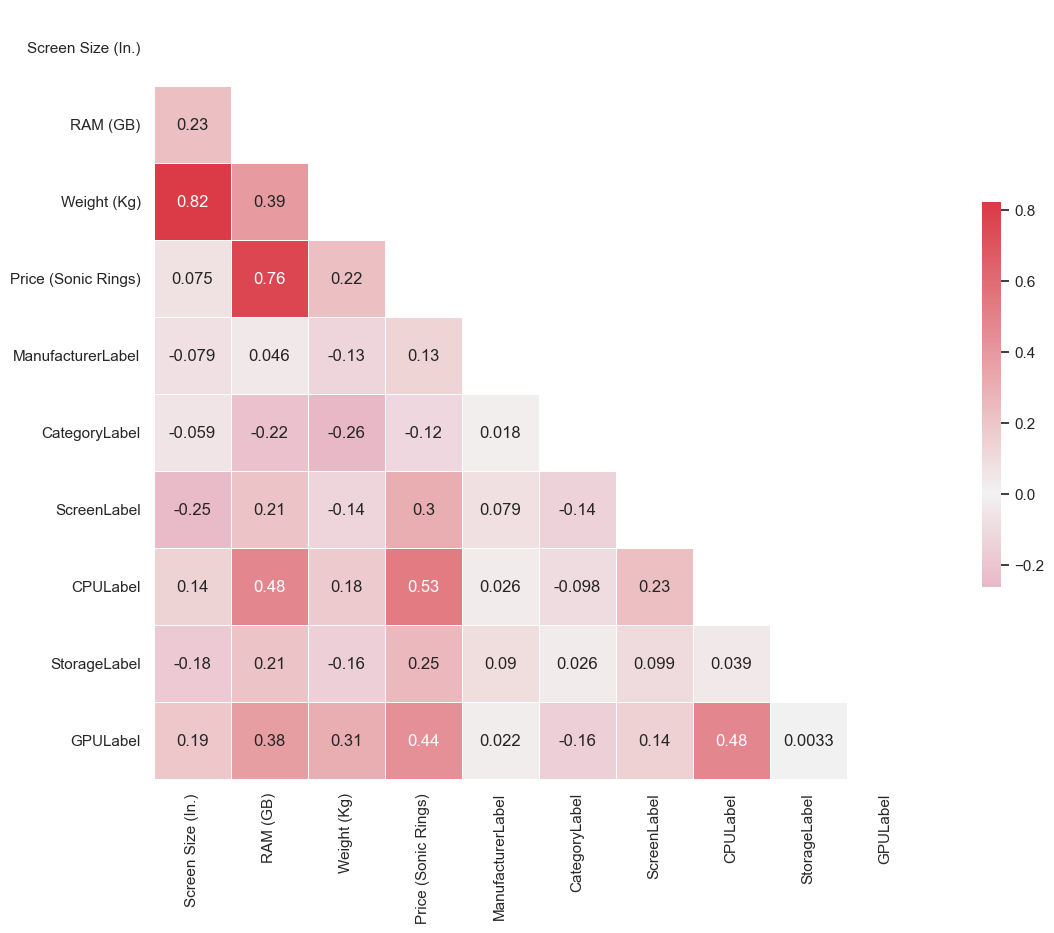

In [36]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [37]:
Removal= ['CategoryLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),Price (Sonic Rings),ManufacturerLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,11912523.48,2,24,59,3,52
1,13.3,8,1.34,7993374.48,2,2,57,1,46
2,15.6,8,1.86,5112900.00,8,9,68,16,48
3,15.4,16,1.83,22563005.40,2,26,78,28,8
4,13.3,8,1.37,16037611.20,2,24,61,16,53


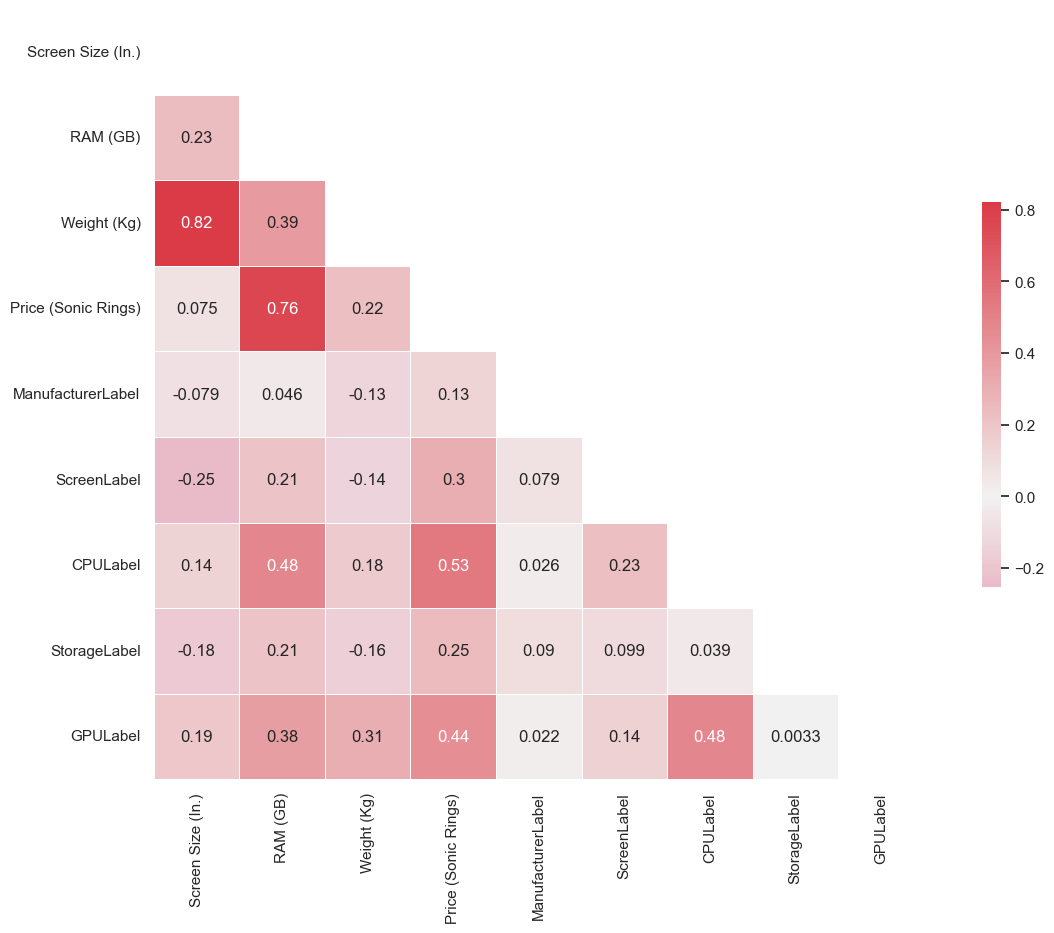

In [38]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [39]:
Removal= ['ManufacturerLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),Price (Sonic Rings),ScreenLabel,CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,11912523.48,24,59,3,52
1,13.3,8,1.34,7993374.48,2,57,1,46
2,15.6,8,1.86,5112900.00,9,68,16,48
3,15.4,16,1.83,22563005.40,26,78,28,8
4,13.3,8,1.37,16037611.20,24,61,16,53


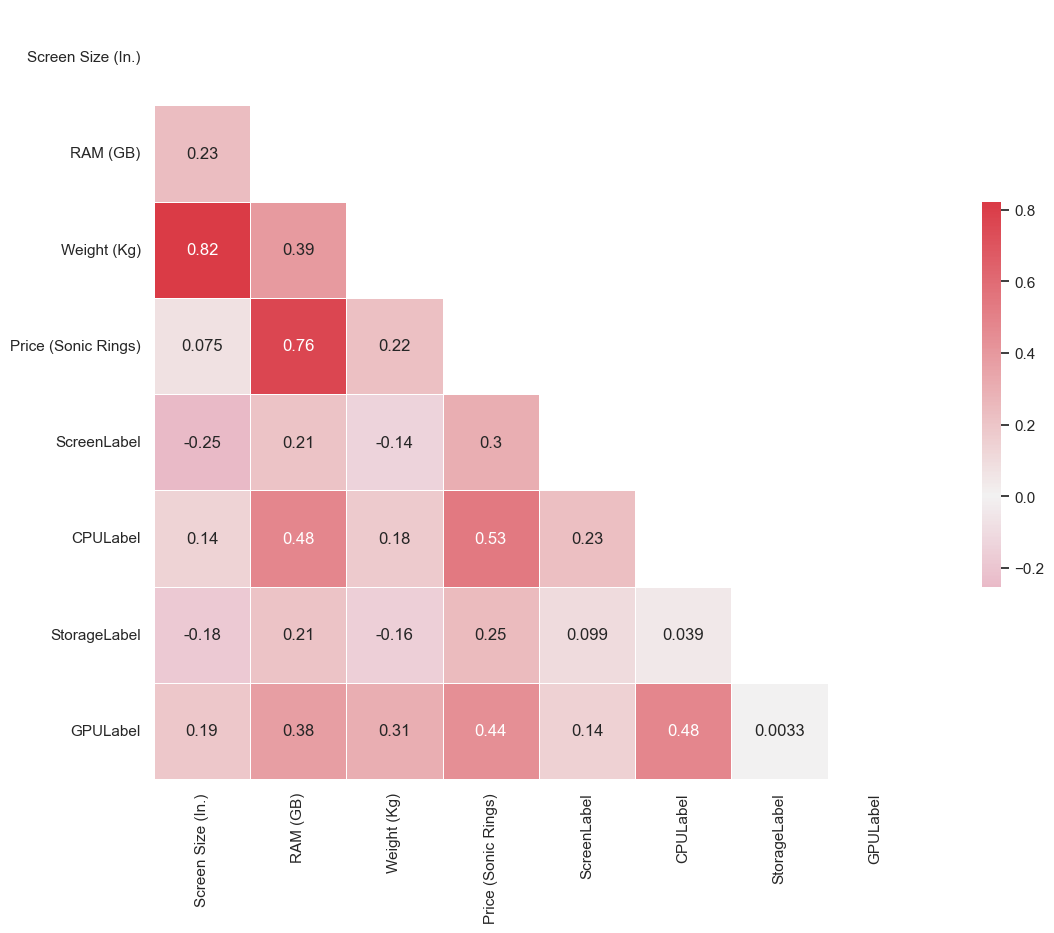

In [40]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [42]:
Removal= ['ScreenLabel']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,Screen Size (In.),RAM (GB),Weight (Kg),Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,13.3,8,1.37,11912523.48,59,3,52
1,13.3,8,1.34,7993374.48,57,1,46
2,15.6,8,1.86,5112900.00,68,16,48
3,15.4,16,1.83,22563005.40,78,28,8
4,13.3,8,1.37,16037611.20,61,16,53


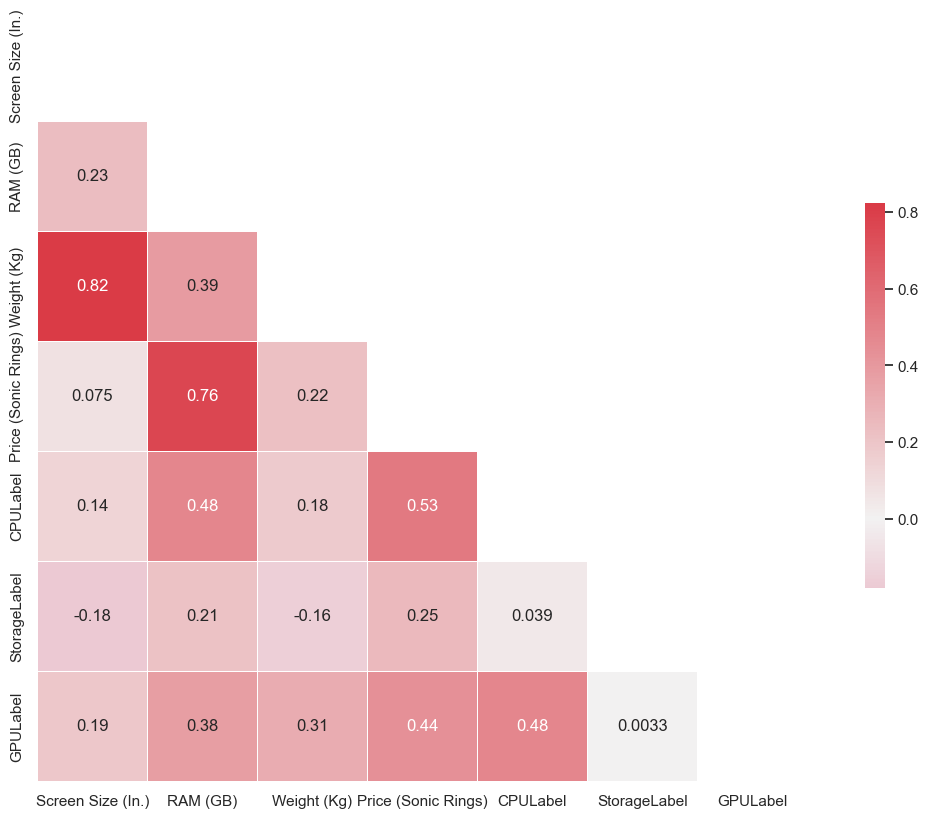

In [43]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [44]:
Removal= ['Screen Size (In.)']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,RAM (GB),Weight (Kg),Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,8,1.37,11912523.48,59,3,52
1,8,1.34,7993374.48,57,1,46
2,8,1.86,5112900.00,68,16,48
3,16,1.83,22563005.40,78,28,8
4,8,1.37,16037611.20,61,16,53


In [46]:
Removal= ['Weight (Kg)']

Numericals= Numericals.drop(columns=Removal)

Numericals.head()

,RAM (GB),Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,8,11912523.48,59,3,52
1,8,7993374.48,57,1,46
2,8,5112900.00,68,16,48
3,16,22563005.40,78,28,8
4,8,16037611.20,61,16,53


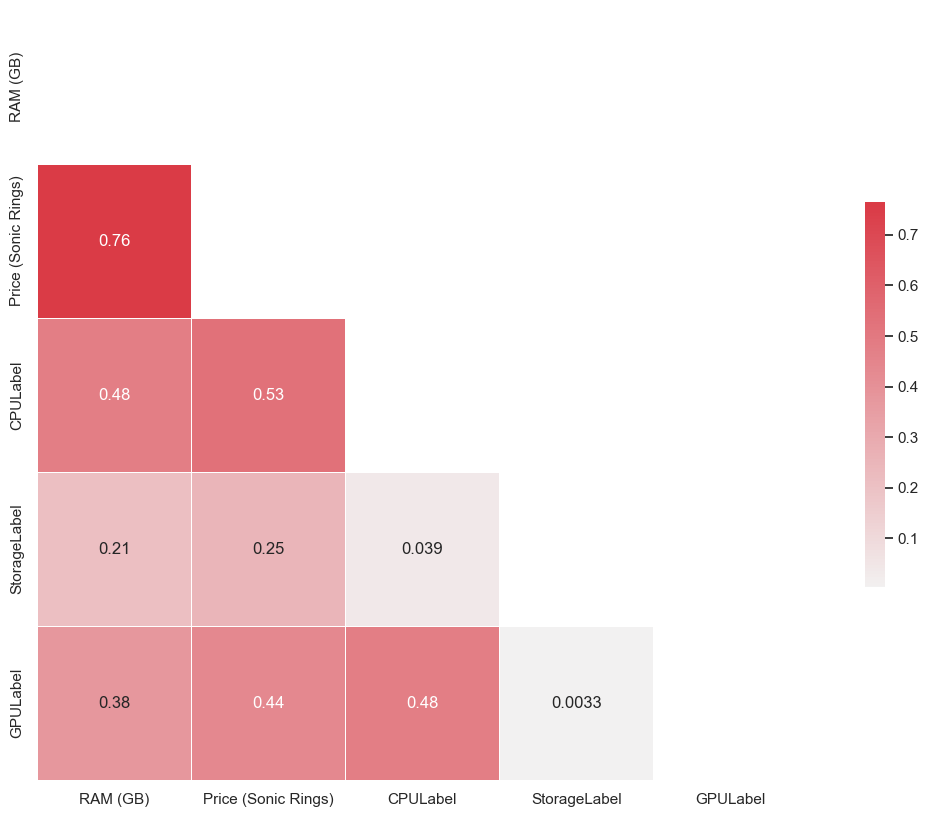

In [47]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(Numericals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(Numericals.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [41]:
training.head()

,Manufacturer,Model Name,Category,Screen Size (In.),Screen,CPU,RAM (GB),Storage,GPU,Operating System,Operating System Version,Weight (Kg),Price (Sonic Rings),ManufacturerLabel,CategoryLabel,ScreenLabel,CPULabel,StorageLabel,GPULabel
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523.48,2,5,24,59,3,52
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,7993374.48,2,5,2,57,1,46
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86,5112900.00,8,4,9,68,16,48
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83,22563005.40,2,5,26,78,28,8
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611.20,2,5,24,61,16,53


In [50]:
dropped_cols=['Manufacturer', 'ManufacturerLabel', 'ScreenLabel', 'Model Name', 'Category', 'CategoryLabel', 'Screen', 'ScreenLabel', 'Operating System', 'Operating System Version', 'Screen Size (In.)', 'Weight (Kg)']

Filtered_training= training.drop(columns=dropped_cols)

Filtered_training.head()


,CPU,RAM (GB),Storage,GPU,Price (Sonic Rings),CPULabel,StorageLabel,GPULabel
0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,11912523.48,59,3,52
1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,7993374.48,57,1,46
2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,5112900.00,68,16,48
3,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,22563005.40,78,28,8
4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,16037611.20,61,16,53


In [51]:
Filtered_training.to_csv('Filtrado.csv', index=False)